<a href="https://colab.research.google.com/github/KC-Night/lab_cv/blob/main/lab_notebook_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
import pickle
with open('data/minst.pkl', 'rb') as f:
    data = pickle.load(f)
X_train, y_train = data['X_train'], data['y_train']
X_test, y_test = data['X_test'], data['y_test']
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

Q1

In [ ]:
!git clone "https://github.com/KC-Night/lab_cv.git"

Cloning into 'lab_cv'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 10.96 MiB | 9.49 MiB/s, done.


In [ ]:
import pandas as pd

In [ ]:
import pickle
from sklearn.model_selection import train_test_split

with open('./lab_cv/data/minst.pkl', 'rb') as f:
    data = pickle.load(f)
X_train, y_train = data['X_train'], data['y_train']
X_test, y_test = data['X_test'], data['y_test']

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

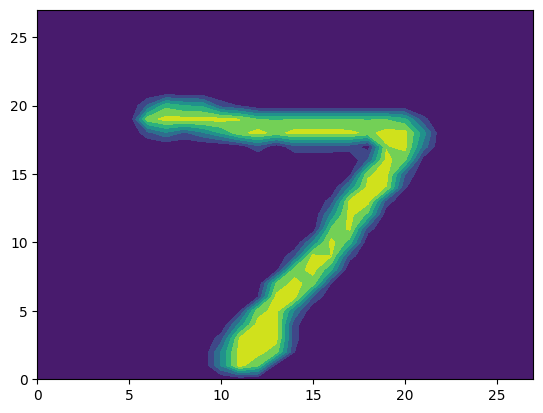

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

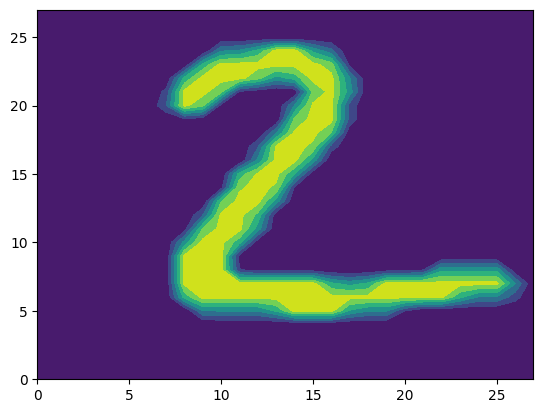

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

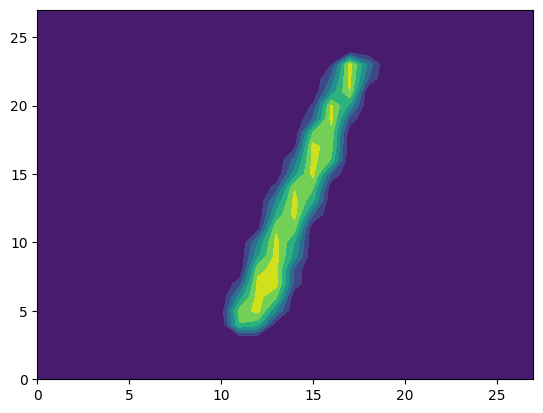

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

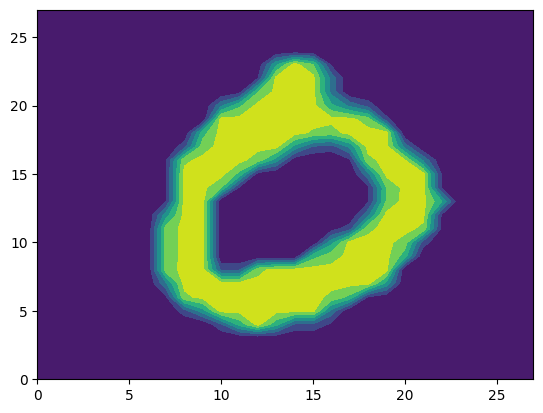

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

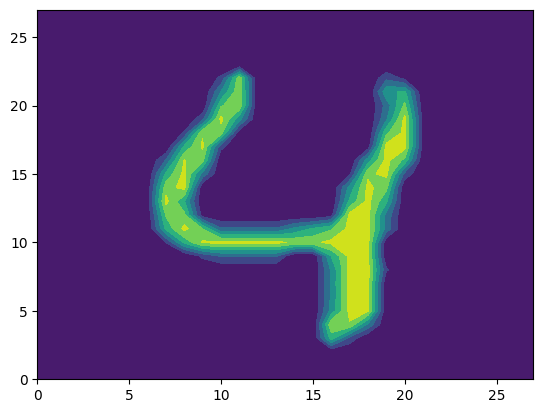

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

Q2

In [ ]:
# What is the shape of X_train and X_test?
# What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

#shape of x_train and x_test
print(X_train.shape)
print(X_test.shape)

#shape of x_train[i] and x_train[i]
print(X_train[i].shape)
print(X_test[i].shape)

#shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


Q3

In [17]:
# Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features.
# So, X_test[index].reshape((1,784)) will convert the  index -th element of X_test into a  28×28=784 -length row vector of values, rather than a matrix.
# Turn X_train into an  N×784  matrix  X  that is suitable for scikit-learn's kNN classifier where  N  is the number of observations and  784=28∗28  (you could use, for example, a for loop).

# reshape X_train data
X_train = X_train.reshape(X_train.shape[0], -1)
print(X_train.shape)

# reshape X_test data
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_test.shape)



(60000, 784)
(10000, 784)


In [18]:
# reshape y_train data
y_train = y_train.reshape(y_train.shape[0], -1)
print(y_train.shape)

# reshape y_test data
y_test = y_test.reshape(y_test.shape[0], -1)
print(y_test.shape)

(60000, 1)
(10000, 1)


Q4

In [19]:
# flatten y_train and y_test to find optimal k
y_train = y_train.ravel()
y_test = y_test.ravel()

In [20]:
# Use the reshaped X_test and y_test data to create a  k -nearest neighbor classifier of digit. What is the optimal number of neighbors  k ?
# If you can't determine this, play around with different values of  k  for your classifier.

from sklearn.neighbors import KNeighborsClassifier
k_values = [1, 2, 3, 4, 5, 7, 9] #k values to test

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) # store training data
    accuracy = knn.score(X_test, y_test) #look for accuracy to find optimal k
    print(f"Accuracy for k={k}: {accuracy}") # print accuracy values

Accuracy for k=1: 0.9691
Accuracy for k=2: 0.9627
Accuracy for k=3: 0.9705
Accuracy for k=4: 0.9682
Accuracy for k=5: 0.9688
Accuracy for k=7: 0.9694
Accuracy for k=9: 0.9659


Optimal: k=3

Q5

In [21]:
#For the optimal number of neighbors, how well does your predictor perform on the test set?
# Report the accuracy, compute a confusion matrix, and explain your findings.

# confusion matrix
pd.crosstab(y_test, knn.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,972,1,1,0,0,2,3,1,0,0
1,0,1132,2,0,0,0,1,0,0,0
2,14,13,978,3,1,0,2,16,5,0
3,0,3,1,976,1,11,1,8,4,5
4,2,11,0,0,936,0,5,1,1,26
5,5,0,0,8,2,867,4,1,1,4
6,6,4,0,0,3,2,943,0,0,0
7,0,27,3,0,1,0,0,986,0,11
8,7,4,4,12,6,13,3,8,911,6


*  Accuracy: 0.9705
*  There appears to be the most confusion among digits that appear visually similar (Ex: 1 and 7, 9 and 4)
*  Overall, the predictor appears to perform pretty well on the test set. An accuracy of 97% means the model is pretty accurate.
*  The confusion matrix shows high numbers of digits being classified correctly, and low numbers of digits being classified incorrectly.
*   Overall, there appears to be high accuracy and reliability.







Q6

In [ ]:
# For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?

In the confusion matrix, most mistakes are seemingly made among identifying digits that look physically similar (Ex: 1 and 7, 9 and 4). However, despite 1 most often being misidentified as 7, it's still the most accurately recognized number. Despite the mistakes, overall, the confusion matrix shows a high reliability in identifying digits

Q7

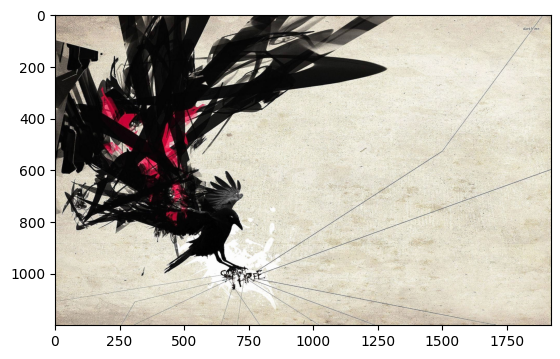

In [22]:
# So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data.
# To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data.
# (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

from PIL import Image
import numpy as np

image_name = "Six_of_Crows.jpg" #image in repo
image = Image.open(image_name).convert("RGB") # Opens the image and converts it to RGB format

rgb_matrix = np.array(image) # Converts the RGB image to a matrix
plt.imshow(rgb_matrix)

In [15]:
height, width, channels = rgb_matrix.shape # get shape

# reshape the matrix to a 2D array where each row is a pixel and columns are RGB channels
rgb_pixels = rgb_matrix.reshape(height * width, channels)
print(rgb_pixels.shape)

(2304000, 3)


In [16]:
df=pd.DataFrame(rgb_pixels, columns=["R", "G", "B"]) #convert array into dataframe
df.head()

,R,G,B
0,148,134,123
1,123,109,98
2,157,143,132
3,135,121,110
4,108,94,81


One way to convert the matrix into tabuler data is to use the PIL function. You can use it to convert the image into RBG values, then use numpy to convert that into a matrix. After that, you can reshape the matrx and convert it into a dataframe of values.